# Homework II

## II. Programming and critical analysis

### 1.

#### a.

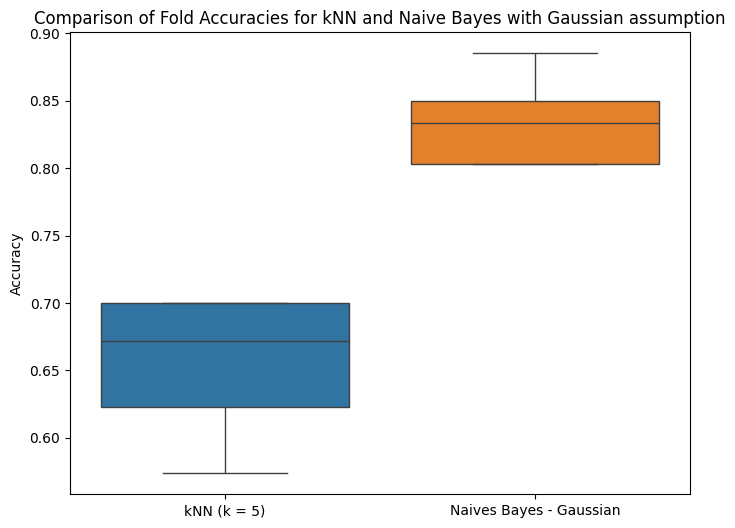

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv("heart-disease.csv")
X = df.drop('target', axis=1)
y = df['target']

kNN_predictor = KNeighborsClassifier(n_neighbors=5)
gaussian_predictor = GaussianNB()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

kNN_scores = cross_val_score(kNN_predictor, X, y, cv=folds, scoring='accuracy')

gaussian_scores = cross_val_score(gaussian_predictor, X, y, cv=folds, scoring='accuracy')

results = pd.DataFrame({
    'kNN (k = 5)': kNN_scores,
    'Naives Bayes - Gaussian': gaussian_scores
})

plt.figure(figsize=(8,6))
sns.boxplot(data=results)
plt.title('Comparison of Fold Accuracies for kNN and Naive Bayes with Gaussian assumption')
plt.ylabel('Accuracy')
plt.show()

#### b.

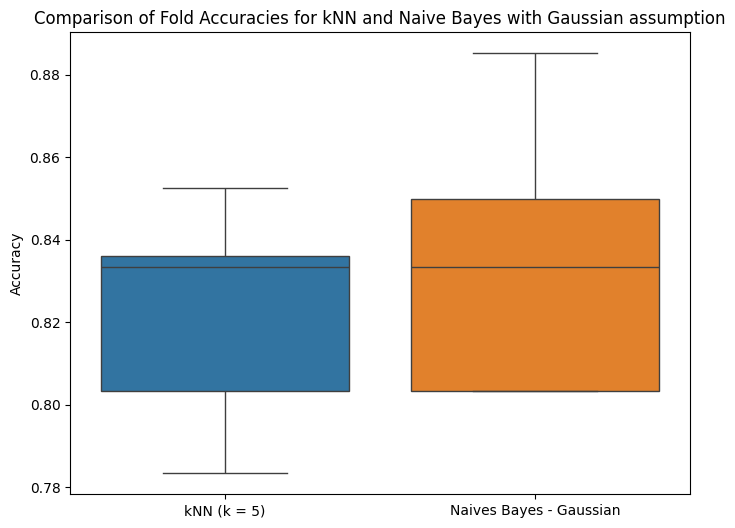

0.75


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy.stats import ttest_rel


df = pd.read_csv("heart-disease.csv")
X = df.drop('target', axis=1)
y = df['target']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

kNN_predictor = KNeighborsClassifier(n_neighbors=5)
nb_predictor = GaussianNB()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

kNN_accs = cross_val_score(kNN_predictor, X_scaled, y, cv=folds, scoring='accuracy')

nb_accs = cross_val_score(nb_predictor, X_scaled, y, cv=folds, scoring='accuracy')

results = pd.DataFrame({
    'kNN (k = 5)': kNN_accs,
    'Naives Bayes - Gaussian': nb_accs
})

plt.figure(figsize=(8,6))
sns.boxplot(data=results)
plt.title('Comparison of Fold Accuracies for kNN and Naive Bayes with Gaussian assumption')
plt.ylabel('Accuracy')
plt.show()

# relativo a alinea c
res = ttest_rel(kNN_accs, nb_accs, alternative='greater')
print(round(res.pvalue, 2))


### 2.

#### a.

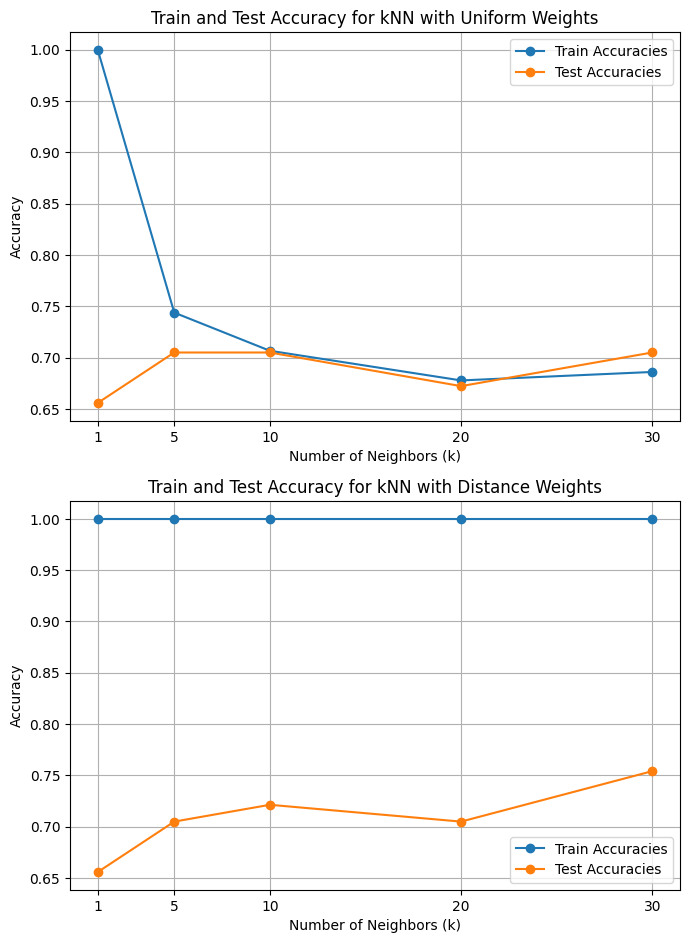

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('heart-disease.csv')
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

k_values = [1, 5, 10, 20, 30]

train_acc_unif = []
test_acc_unif = []

train_acc_distance = []
test_acc_distance = []

for k in k_values:
    # classifier with uniform weights
    kNN_unif = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    kNN_unif.fit(X_train, y_train)

    y_train_unif_pred = kNN_unif.predict(X_train)
    train_acc_unif.append(accuracy_score(y_train, y_train_unif_pred))

    y_test_unif_pred = kNN_unif.predict(X_test)
    test_acc_unif.append(accuracy_score(y_test, y_test_unif_pred))

    # classifier with distance weights
    kNN_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    kNN_distance.fit(X_train, y_train)

    y_train_dist_pred = kNN_distance.predict(X_train)
    train_acc_distance.append(accuracy_score(y_train, y_train_dist_pred))

    y_test_dist_pred = kNN_distance.predict(X_test)
    test_acc_distance.append(accuracy_score(y_test, y_test_dist_pred))

plt.figure(figsize=(7, 14))

# k-NN with uniform weights
plt.subplot(3, 1, 2)
plt.plot(k_values, train_acc_unif, marker='o', label='Train Accuracies')
plt.plot(k_values, test_acc_unif, marker='o', label='Test Accuracies')
plt.title('Train and Test Accuracy for kNN with Uniform Weights')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

# k-NN with distance weights
plt.subplot(3, 1, 3)
plt.plot(k_values, train_acc_distance, marker='o', label='Train Accuracies')
plt.plot(k_values, test_acc_distance, marker='o', label='Test Accuracies')
plt.title('Train and Test Accuracy for kNN with Distance Weights')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
